In [1]:
# importing different libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
#loading Data
data = pd.read_csv('/content/50_Startups.csv')

**Data Overview**

In [4]:
print("Dataset Overview:")
# seeing 1st 5 rows of data
print(data.head())

Dataset Overview:
   R&D Spend  Administration  Marketing Spend     Profit
0  165349.20       136897.80        471784.10  192261.83
1  162597.70       151377.59        443898.53  191792.06
2  153441.51       101145.55        407934.54  191050.39
3  144372.41       118671.85        383199.62  182901.99
4  142107.34        91391.77        366168.42  166187.94


In [5]:
print("\nDataset Information:")
print(data.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB
None


In [6]:
print("\nMissing Values in Each Column:")
print(data.isnull().sum())


Missing Values in Each Column:
R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64


In [7]:
print("\nStatistical Summary:")
print(data.describe())



Statistical Summary:
           R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   14681.400000
25%     39936.370000   103730.875000    129300.132500   90138.902500
50%     73051.080000   122699.795000    212716.240000  107978.190000
75%    101602.800000   144842.180000    299469.085000  139765.977500
max    165349.200000   182645.560000    471784.100000  192261.830000


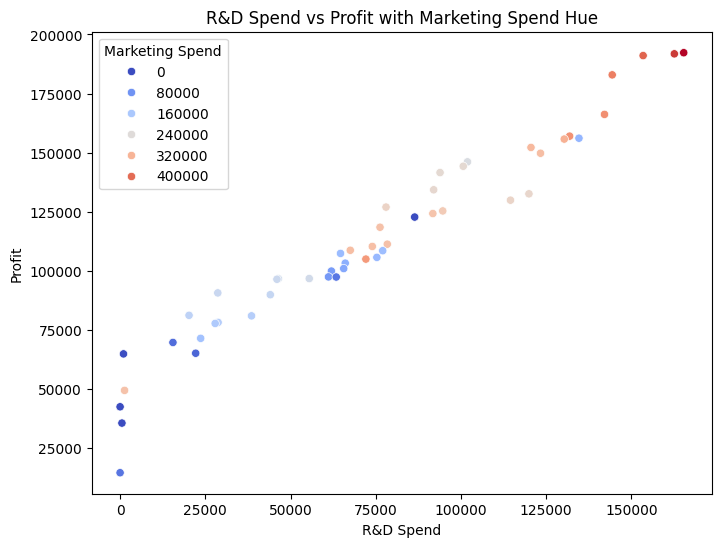

In [8]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['R&D Spend'], y=data['Profit'], hue=data['Marketing Spend'], palette='coolwarm')
plt.title('R&D Spend vs Profit with Marketing Spend Hue')
plt.show()

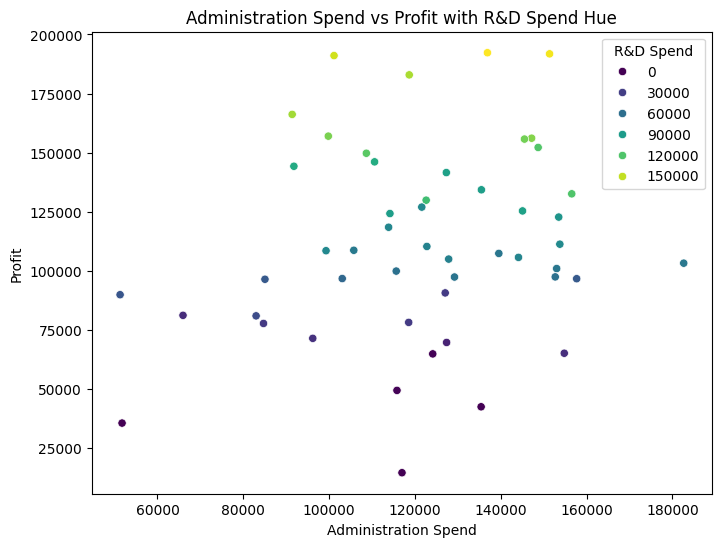

In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Administration'], y=data['Profit'], hue=data['R&D Spend'], palette='viridis')
plt.title('Administration Spend vs Profit with R&D Spend Hue')
plt.xlabel('Administration Spend')
plt.ylabel('Profit')
plt.show()

<ipython-input-10-31f0b51a812f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data['Marketing Spend'], y=data['Profit'], palette='plasma')


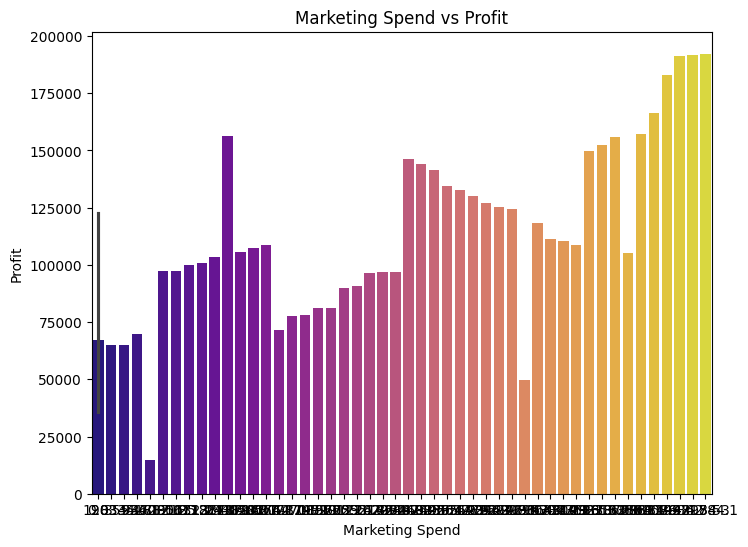

In [10]:
plt.figure(figsize=(8, 6))
sns.barplot(x=data['Marketing Spend'], y=data['Profit'], palette='plasma')
plt.title('Marketing Spend vs Profit')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has be

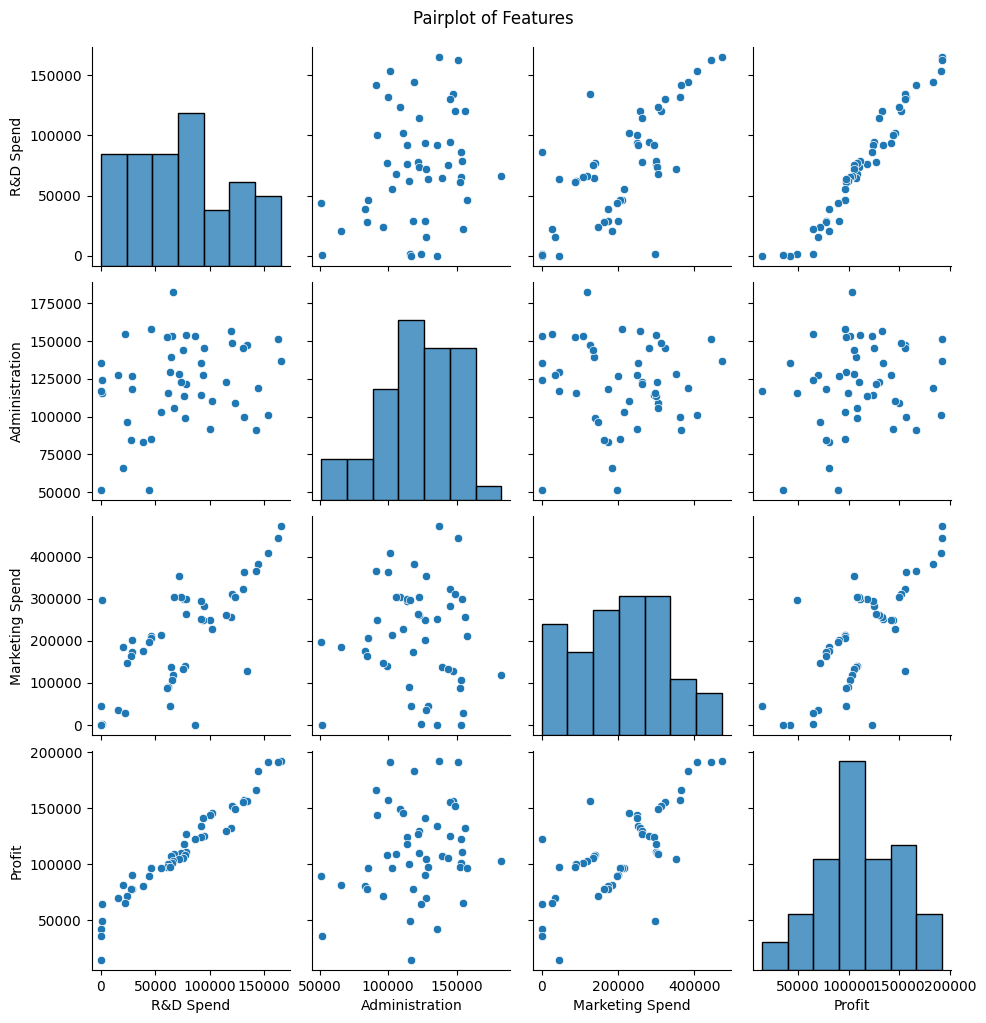

In [11]:
sns.pairplot(data, palette='coolwarm')
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()

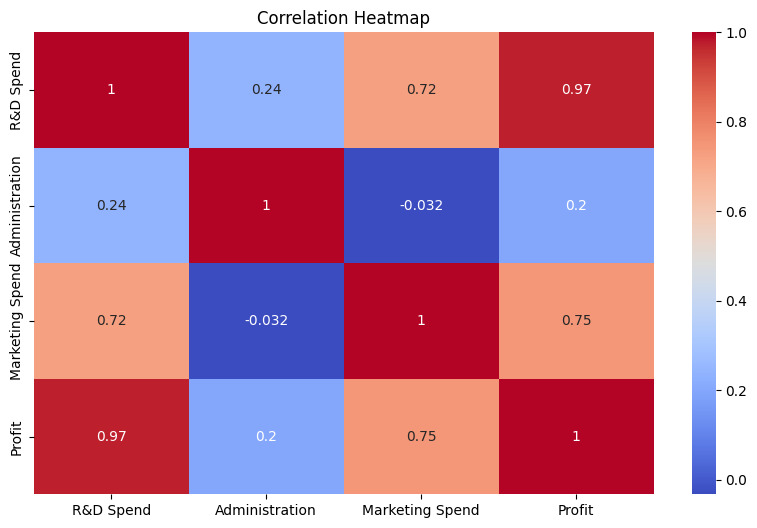

In [12]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [13]:
if 'State' in data.columns:
    data = pd.get_dummies(data, columns=['State'], drop_first=True)


In [14]:
X = data.drop('Profit', axis=1)
y = data['Profit']

In [15]:
# splitting data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Random Forest Regressor": RandomForestRegressor(random_state=42)
}


In [17]:
results = []

In [18]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    # Predict on the test set
    y_pred = model.predict(X_test)
    # Calculating metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    accuracy = max(0, r2) * 100
    # Appending results
    results.append({
        "Model": name,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R² Score": r2,
        "Accuracy (%)": accuracy
    })

In [19]:
results_df = pd.DataFrame(results)
print("\nModel Performance Comparison:")

print(results_df)


Model Performance Comparison:
                     Model          MAE           MSE         RMSE  R² Score  \
0        Linear Regression  6979.152252  8.092632e+07  8995.905803  0.900065   
1         Ridge Regression  6979.152252  8.092632e+07  8995.905803  0.900065   
2         Lasso Regression  6979.152235  8.092632e+07  8995.905778  0.900065   
3  Random Forest Regressor  6437.497740  7.262501e+07  8522.030780  0.910316   

   Accuracy (%)  
0     90.006531  
1     90.006531  
2     90.006531  
3     91.031647  


In [20]:
best_model = results_df.loc[results_df['R² Score'].idxmax()]
print(f"\nBest Model: {best_model['Model']}")
print(f"Best Model R² Score: {best_model['R² Score']}")


Best Model: Random Forest Regressor
Best Model R² Score: 0.9103164738430438


In [21]:
best_model = results_df.loc[results_df['Accuracy (%)'].idxmax()]
print(f"\nBest Model: {best_model['Model']}")
print(f"Best Model Accuracy: {best_model['Accuracy (%)']:.2f}%")


Best Model: Random Forest Regressor
Best Model Accuracy: 91.03%


In [22]:
results_df.to_csv('model_performance_comparison.csv', index=False)

In [23]:
if best_model['Model'] == "Random Forest Regressor":
    import joblib
    best_model_instance = RandomForestRegressor(random_state=42)
    best_model_instance.fit(X_train, y_train)
    joblib.dump(best_model_instance, 'best_model.pkl')

In [24]:
print(f"Model type: {type(best_model)}")

Model type: <class 'pandas.core.series.Series'>


In [ ]:
if best_model['Model'] == "Random Forest Regressor":
    # Train the model
    best_model_instance = RandomForestRegressor(random_state=42)
    best_model_instance.fit(X_train, y_train)

    # Save the trained model
    joblib.dump(best_model_instance, 'best_model.pkl')
    print("Model saved successfully.")
else:
    print("Model type doesn't match 'Random Forest Regressor'.")

best_model_instance = joblib.load('best_model.pkl')
print(f"Model type: {type(best_model_instance)}")
trained_feature_columns = ['R&D Spend', 'Administration', 'Marketing Spend']

# Now use best_model_instance for predictions
def user_input_predict_colab(model, data, feature_columns):
    def suggest_input_ranges(data):
        print("\nSuggested input ranges based on the dataset:")
        for column in ['R&D Spend', 'Administration', 'Marketing Spend']:
            if column in data.columns:
                min_val = data[column].min()
                max_val = data[column].max()
                mean_val = data[column].mean()
                print(f"- {column}: Min: {min_val:.2f}, Max: {max_val:.2f}, Avg: {mean_val:.2f}")

    suggest_input_ranges(data)

    try:
        rd_spend = float(input("Enter R&D Spend: "))
        administration = float(input("Enter Administration Spend: "))
        marketing_spend = float(input("Enter Marketing Spend: "))
    except ValueError:
        print("Invalid input! Please enter numeric values for spends.")
        return

    new_data_dict = {
        'R&D Spend': rd_spend,
        'Administration': administration,
        'Marketing Spend': marketing_spend,
    }

    new_data = pd.DataFrame([new_data_dict])[feature_columns]

    prediction = model.predict(new_data)
    print(f"\nPredicted Profit: {prediction[0]:.2f}")

user_input_predict_colab(best_model_instance, data, trained_feature_columns)


Model saved successfully.
Model type: <class 'sklearn.ensemble._forest.RandomForestRegressor'>

Suggested input ranges based on the dataset:
- R&D Spend: Min: 0.00, Max: 165349.20, Avg: 73721.62
- Administration: Min: 51283.14, Max: 182645.56, Avg: 121344.64
- Marketing Spend: Min: 0.00, Max: 471784.10, Avg: 211025.10


In [35]:
data.tail()

,R&D Spend,Administration,Marketing Spend,Profit
45,1000.23,124153.04,1903.93,64926.08
46,1315.46,115816.21,297114.46,49490.75
47,0.00,135426.92,0.00,42559.73
48,542.05,51743.15,0.00,35673.41
49,0.00,116983.80,45173.06,14681.40
